# Bias-Variance Tradeoff

## Introduction

You've seen how you can extend your linear models by including interaction effects as well as polynomial terms. Including these in models comes at a price though: not only do the models become more complex (with more parameter estimates), adding more terms can potentially harm model performance when making predictions. This tradeoff between performance on the training data and performance making predictions is called the bias-variance tradeoff. You'll learn about that in this lesson.

## Objectives

You will be able to:

- Describe the bias-variance tradeoff in machine learning 
- Discuss how bias and variance are related to over and underfitting 
- List the three components of error 

## Using Models for Prediction

You have learned earlier how to use regression models to make predictions. This is without any doubt one of the main reasons why regression models are used.

When building models for predicting, we have previously seen the need for model **validation**, which tells us how well the model is likely to perform on unseen data (not just the data used for training the model). The main two validation approaches are a train-test split and cross-validation. We'll use a train-test split for these examples, with a modified version of the `Yield` dataset.

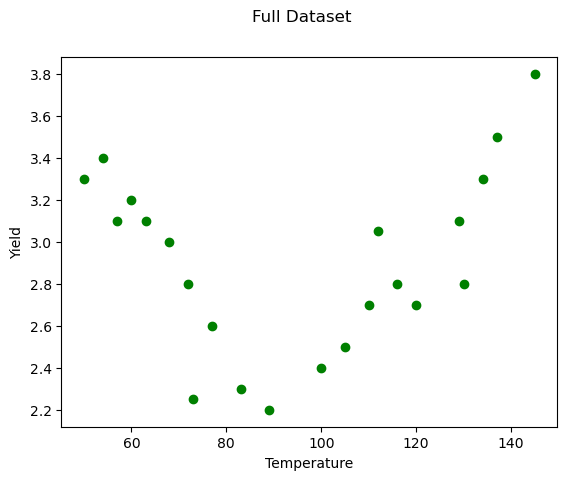

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

yld = pd.read_csv('yield2.csv', sep='\s+', index_col=0)

y = yld['Yield']
X = yld[['Temp']]

fig, ax = plt.subplots()
ax.scatter(X, y, color='green')
ax.set_xlabel('Temperature')
ax.set_ylabel('Yield')
fig.suptitle('Full Dataset');

Let's split this dataset in a training set, containing 70% of the observations, and a test set, containing 30% of the observations.

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=34567)

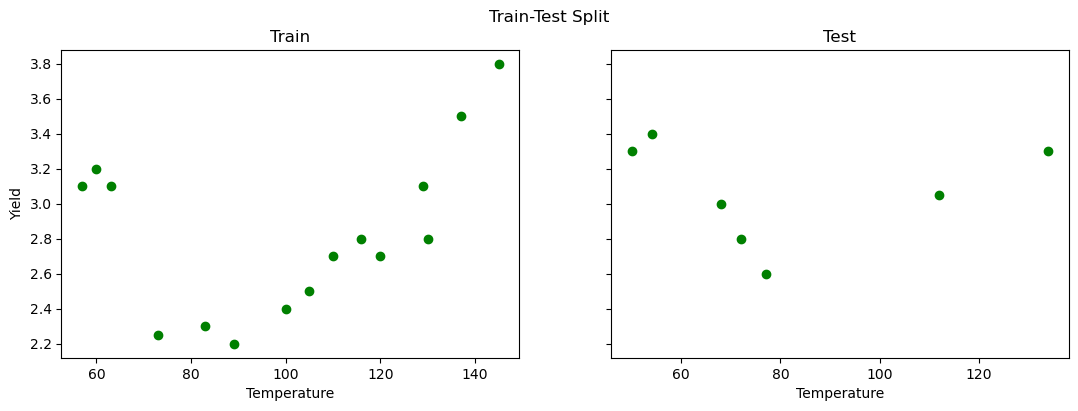

In [3]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4), sharey=True)

axes[0].scatter(X_train, y_train, color='green')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Yield')
axes[0].set_title('Train')

axes[1].scatter(X_test, y_test, color='green')
axes[1].set_xlabel('Temperature')
axes[1].set_title('Test')

fig.suptitle('Train-Test Split');

There seems to be a downward trend first, then upwards. Despite this, let's go ahead and start by fitting a simple linear regression:

In [4]:
reg = LinearRegression().fit(X_train, y_train)

When plotting a simple linear regression model there are no unexpected results: the line is a bad fit, both for training and test set.

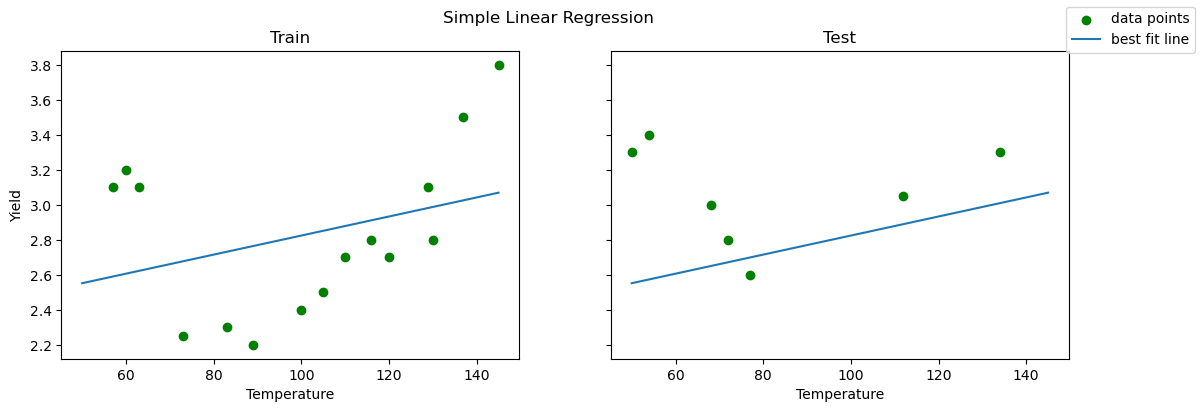

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4), sharey=True)
X_linspace = pd.DataFrame(np.linspace(50, 145, 50), columns=['Temp'])

axes[0].scatter(X_train, y_train, color='green', label="data points")
axes[0].plot(X_linspace, reg.predict(X_linspace), label="best fit line")
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Yield')
axes[0].set_title('Train')

axes[1].scatter(X_test, y_test, color='green')
axes[1].plot(X_linspace, reg.predict(X_linspace))
axes[1].set_xlabel('Temperature')
axes[1].set_title('Test')

fig.legend()
fig.suptitle('Simple Linear Regression');

When including polynomials, however, the result changes. We included a polynomial of 6 here. The result seems to be very accurate for the training set, but the picture is definitely different for the test set on the right-hand side. Where the fit seemed to be good for the training set, the test set fit is not nearly as good. The problem is that our model did *not generalize well* to cases outside the training set.

In [6]:
# 6th degree polynomial
poly = PolynomialFeatures(6)
reg_poly = LinearRegression().fit(poly.fit_transform(X_train), y_train)

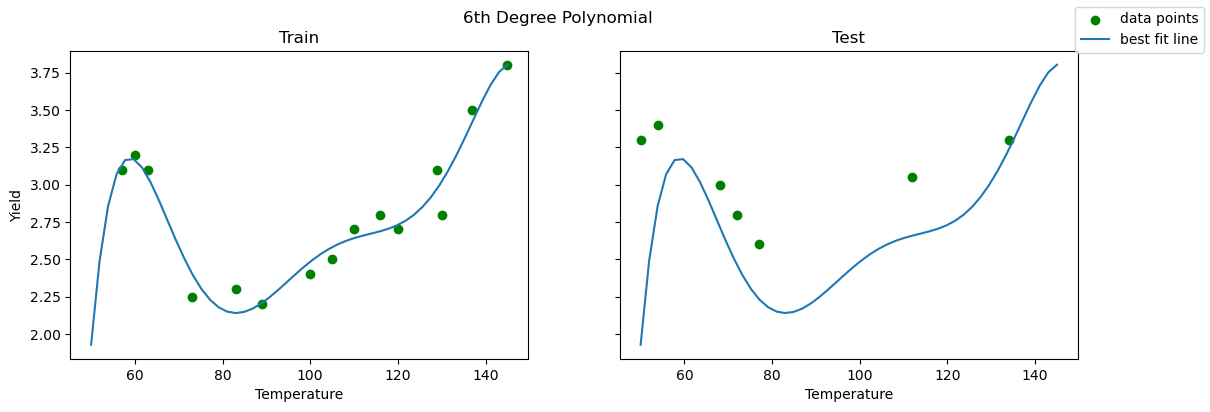

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4), sharey=True)

axes[0].scatter(X_train, y_train, color='green', label="data points")
axes[0].plot(X_linspace, reg_poly.predict(poly.transform(X_linspace)), label="best fit line")
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Yield')
axes[0].set_title('Train')

axes[1].scatter(X_test, y_test, color='green')
axes[1].plot(X_linspace, reg_poly.predict(poly.transform(X_linspace)))
axes[1].set_xlabel('Temperature')
axes[1].set_title('Test')

fig.legend()
fig.suptitle('6th Degree Polynomial');

Let's have a look at the train vs. test mean squared error for the two models:

In [8]:
print(f"""
Simple Linear Regression
Train MSE: {mean_squared_error(y_train, reg.predict(X_train))}
Test MSE:  {mean_squared_error(y_test, reg.predict(X_test))}

6th Degree Polynomial
Train MSE: {mean_squared_error(y_train, reg_poly.predict(poly.transform(X_train)))}
Test MSE:  {mean_squared_error(y_test, reg_poly.predict(poly.transform(X_test)))}
""")


Simple Linear Regression
Train MSE: 0.18250661207533306
Test MSE:  0.21472110882651188

6th Degree Polynomial
Train MSE: 0.010410627938288126
Test MSE:  0.3775805417129779



These numbers align with the plots above. The simple linear regression has poor MSE scores for both the train and test data. The 6th degree polynomial regression has a better train MSE than simple linear regression, and a worse test MSE.

## Underfitting and Overfitting

Let's formalize this:

> *Underfitting* happens when a model cannot learn the training data, nor can it generalize to new data.

The **simple linear regression** model fitted earlier was an **underfitted** model.

> *Overfitting* happens when a model learns the training data too well. In fact, so well that it is not generalizeable to new data 

The **6-degree polynomial** was **overfitted**.

Now, let's have a look at the same plots but with second degree polynomial.

In [9]:
# 2nd degree polynomial
poly_2 = PolynomialFeatures(2)  
reg_poly_2 = LinearRegression().fit(poly_2.fit_transform(X_train), y_train)

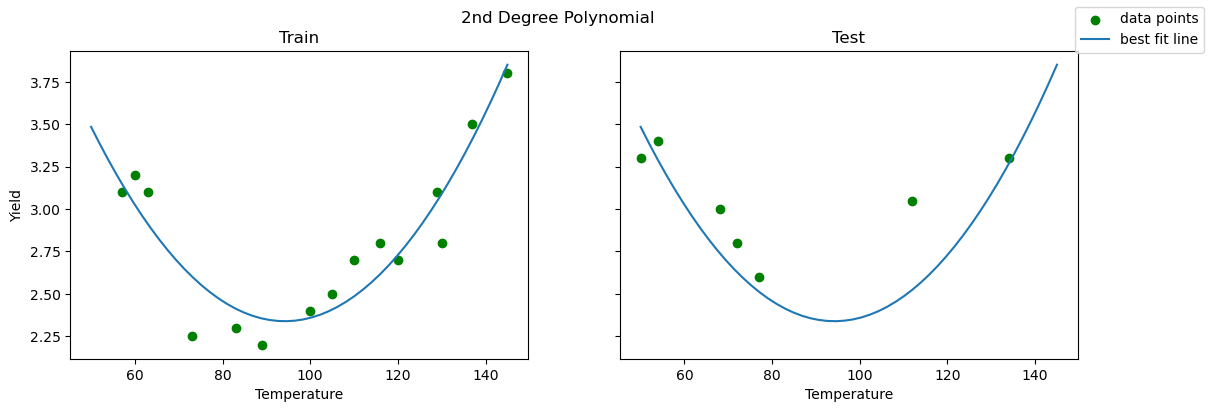

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4), sharey=True)

axes[0].scatter(X_train, y_train, color='green', label="data points")
axes[0].plot(X_linspace, reg_poly_2.predict(poly_2.transform(X_linspace)), label="best fit line")
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Yield')
axes[0].set_title('Train')

axes[1].scatter(X_test, y_test, color='green')
axes[1].plot(X_linspace, reg_poly_2.predict(poly_2.transform(X_linspace)))
axes[1].set_xlabel('Temperature')
axes[1].set_title('Test')

fig.legend()
fig.suptitle('2nd Degree Polynomial');

That looks like a more reasonable model. Let's look at the MSE scores:

In [11]:
print(f"""
Simple Linear Regression
Train MSE: {mean_squared_error(y_train, reg.predict(X_train))}
Test MSE:  {mean_squared_error(y_test, reg.predict(X_test))}

6th Degree Polynomial
Train MSE: {mean_squared_error(y_train, reg_poly.predict(poly.transform(X_train)))}
Test MSE:  {mean_squared_error(y_test, reg_poly.predict(poly.transform(X_test)))}

2nd Degree Polynomial
Train MSE: {mean_squared_error(y_train, reg_poly_2.predict(poly_2.transform(X_train)))}
Test MSE:  {mean_squared_error(y_test, reg_poly_2.predict(poly_2.transform(X_test)))}
""")


Simple Linear Regression
Train MSE: 0.18250661207533306
Test MSE:  0.21472110882651188

6th Degree Polynomial
Train MSE: 0.010410627938288126
Test MSE:  0.3775805417129779

2nd Degree Polynomial
Train MSE: 0.027868760930878828
Test MSE:  0.06124237736142424



The fit for the training set became worse with the 2nd degree polynomial compared to the 6th degree polynomial, but we can clearly see how the test set performance improved by looking at the mean squared error. Also, it seems like the results for training and test set are comparable, which is what you would want in general.

Based on this analysis, it appears that a 2nd degree polynomial achieves the correct degree of balance between underfitting (like the simple linear regression) and overfitting (like the 6th degree polynomial).

## Bias-Variance Tradeoff

Another perspective on this problem of overfitting versus underfitting is the bias-variance tradeoff. The idea is that we can decompose the mean squared error as the sum of: 

- *bias*
- *variance*, and
- *irreducible error* 

Formally, this is written as: 
$ MSE = Bias(\hat{f}(x))^2 + Var(\hat{f}(x)) + \sigma^2$. The derivation of this result can be found on the Wikipedia page of the bias-variance trade-off, [here](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff#Derivation).

### Bias

While you have probably heard of "machine learning bias" in a colloquial sense, e.g. [racial discrimination in facial recognition technologies](https://sitn.hms.harvard.edu/flash/2020/racial-discrimination-in-face-recognition-technology/), this is using a different definition of "bias". Bias in this context means a poor model fit. For example, the simple linear regression applied to the `Yield` dataset has high bias, because the model assumes a linear relationship when it appears that the actual relationship is polynomial.

This kind of bias can arise from model assumptions being violated, or simply using the wrong type of model for the underlying relationship.

**High bias** leads to **underfitting**.

### Variance

Variance is also a term used elsewhere in statistics, but in this context it means that the model's performance varies too much based on small fluctuations in the training set. A model with high variance is usually trying to fit based on the irreducible error, which is actually just random noise and is not helpful in making predictions on unseen data.

**High variance** leads to **overfitting**.

### Irreducible Error

Most of the time there will be some amount of error that is impossible to remove, regardless of whether the model is perfectly specified based on the available features. Often this is because there is some missing feature, or simply because there is random variation in the variables that is not related to the underlying relationship.

If error is larger than 0, this may because of irreducible error, not because of underfitting or overfitting.

<img src="https://curriculum-content.s3.amazonaws.com/data-science/images/new_bias_variance.png" alt="Drawing" width="500">

The balance between bias and variance is a tradeoff. We can reduce the variance but then there is a risk of running a bigger bias, and vice versa. **Bias** is usually associated with **low model complexity**, **variance** with **high model complexity**. There is generally a "sweet spot" in-between, compromising between bias and variance.

## Additional resources

https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

## Summary

Great, now you know what bias-variance tradeoff is, what underfitting and overfitting are, and how all of these relate, let's dive in for some practice!